In [58]:
%matplotlib inline
import plotting_Boyle as plt_B
reload(plt_B)
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

import sys 
sys.path.append('../code_general/')
from read_model_ID import unpack_parameters
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);
import plotting_Boyle as plt_B
reload(plt_B)
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

import analysis_SA_fits as SAfits
reload(SAfits);

import Boyle_data_processing as Bdata
reload(Bdata);

import read_model_ID;
reload(read_model_ID);

import Weighted_Average as WA
reload(WA)

import coarsegrained_Model as cg
reload(cg)

sys.path.append('../code_Boyle/')
import dCas92Cas9 as Cas9
reload(Cas9);

data_folder = '../data/22_3_2019/'

model_id = 'general_energies_no_kPR'


In [3]:
simset = []
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,101):
    sa = pd.read_csv(data_folder + 'fit_22_3_2019_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = data_folder + 'fit_22_3_2019_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    

    
    
best_fit = simset[np.argmin(chi_squared)]
best_fit

'../data/22_3_2019/fit_22_3_2019_sim_13.txt'

In [4]:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset,percentage=0.1)

In [13]:
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(selected_sims,
                                                                                        Nparams=43,
                                                                                        model_id=model_id)

In [96]:
log_rates = list(rates.median().drop(['PAM_to_sol', 'R1_to_PAM', 'PAM_to_R1']).apply(np.log10))
eps_I = list(mismatches.median())
eps_c = [energies[1]]+(list(-1*np.diff(energies)[1:]))
parameters = np.array(eps_c+eps_I+log_rates)
parameters[-2] = -2.4
parameters[13] = parameters[13]-2.0
parameters[16] = parameters[16]+2.0
parameters[23:25] +=-1.5
parameters[36] = parameters[36]+1.5

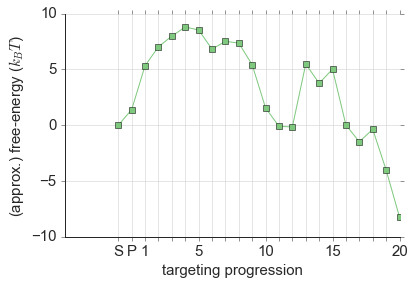

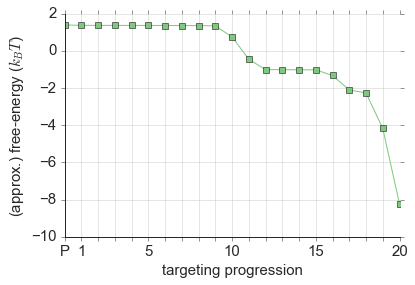

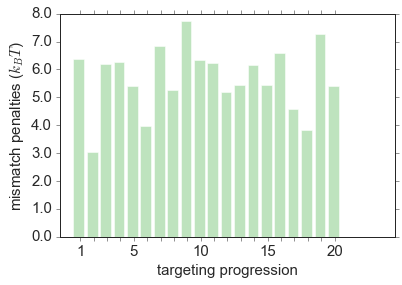

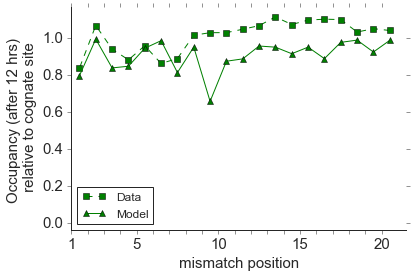

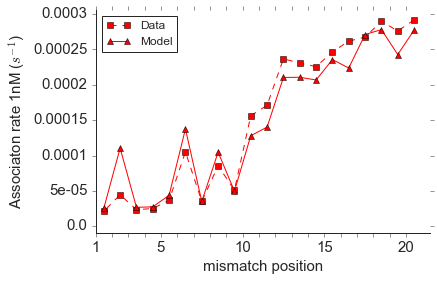

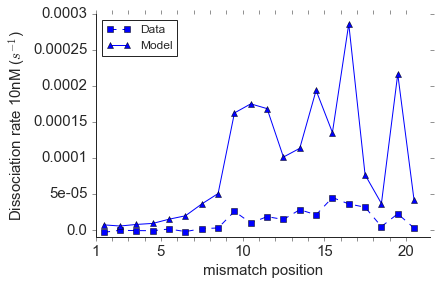

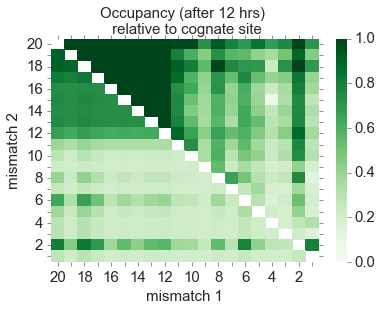

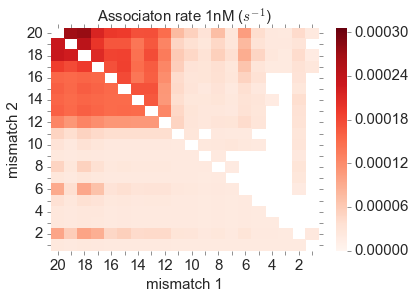

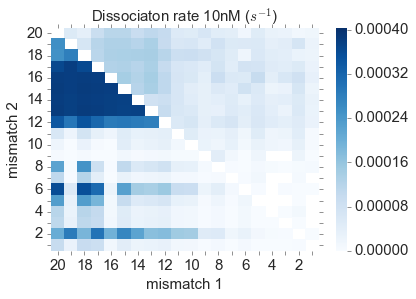

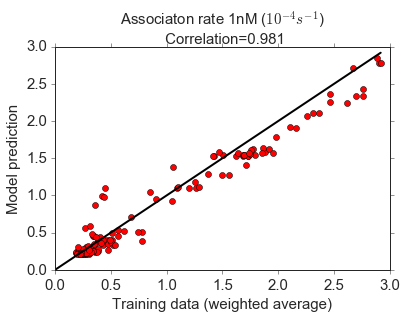

In [97]:
Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)


Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id);

plt.figure()
FreeEnergy.plot_mismatch_penalties(parameters, model_id)


plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')

plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_on ,kind='OnRate')

plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
_,_ = plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')

plt.figure()
best_model,_ = plt_B.plot_heatmap(Model_on ,kind='OnRate')

plt.figure()
_,_ = plt_B.plot_heatmap(Model_off ,kind='OffRate')

plt.figure()
_,_,_ = WA.predict_train(parameters)

0.148123512845


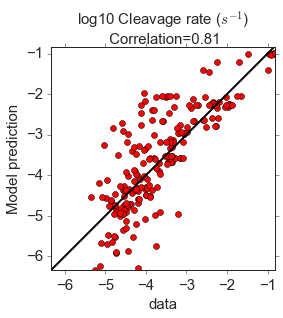

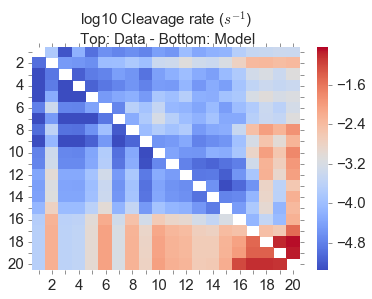

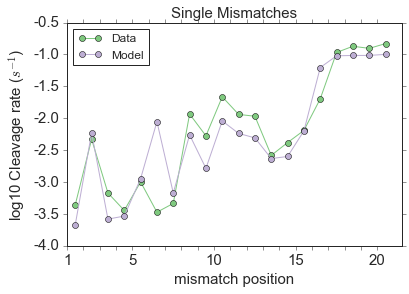

In [98]:
clv_rate = 1000.0
chi_square, corr, score, data, single_dat, double_mat = Cas9.predict_clv(parameters, clv_rate, True)
print score

In [99]:
chi_square

99183.678545809074